<a href="https://colab.research.google.com/github/ElenaNtm/power-thefts-investigation/blob/main/hedno_stat_analysis(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd 
import numpy as np
import math
import operator 
from datetime import datetime
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#from sklearn.metrics import confusion_matrix

In [4]:
#from sklearn.ensemble import HistGradientBoostingClassifier

In [5]:
#from sklearn.model_selection import train_test_split
#import sklearn

In [6]:
#from sklearn.preprocessing import OrdinalEncoder

!! Αν δεις και γεμιζει η RAΜ κανε επανεκκινηση χρονου εκτελεσης

# The Dataset

## Powerthefts - Target Variable

In [7]:
path = "/content/drive/MyDrive/HEDNO/PowerThefts_TRAIN.csv"
df_power_thefts = pd.read_csv(path, sep= ',')
df_power_thefts.head()

,Unnamed: 0.1,Unnamed: 0,ACCT_NBR,SUCCESSOR,ΤΡΟΠΟΣ_ΕΝΤΟΠΙΣΜΟΥ,ΣΗΜΕΙΟ_ΕΝΤΟΠΙΣΜΟΥ,HMANAF,INITIAL_DETECTION_DATE,DETECTION_DATE,NON_REGISTERED_ENERGY
0,0,0,000A31FE38C6F648845941B642E287FE02000000004D63...,3,Μέσω Λοιπών Εργασιών & Συντήρησης,ΑΓΝΩΣΤΟ,2018-03-01,2018-03-01,NaN,1283.0
1,1,1,000A31FE38C6F648845941B642E287FE0200000000801E...,8,Μέσω Καταμέτρησης (ΔΑΚ),ΑΚΡΟΔΕΚΤΕΣ,2018-08-16,2018-11-01,2018-11-01,640.0
2,2,2,000A31FE38C6F648845941B642E287FE0200000000B03B...,2,Μέσω Λοιπών Εργασιών & Συντήρησης,ΜΗΧΑΝΙΣΜΟΣ ΜΕΤΡΗΣΗΣ,2018-12-05,2018-12-18,NaN,4665.0
3,3,3,000A31FE38C6F648845941B642E287FE0200000000BCD9...,2,Μέσω Λοιπών Εργασιών & Συντήρησης,ΑΚΡΟΔΕΚΤΕΣ,2017-01-19,2017-01-30,NaN,NaN
4,4,4,000A31FE38C6F648845941B642E287FE02000000017AA3...,5,Μέσω Λοιπών Εργασιών & Συντήρησης,ΑΓΝΩΣΤΟ,2019-05-29,2019-05-29,NaN,1049.0


In [8]:
df_power_thefts.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace = True)

###Check Duplicate lines - No duplicate lines

In [9]:
#bool_series = df_power_thefts.duplicated()

In [10]:
#[i for i, x in enumerate(bool_series) if x]

## Rest Train + Test

###Records

In [11]:
path = "/content/drive/MyDrive/HEDNO/Records_TRAIN.csv"
df_records_train = pd.read_csv(path, sep= '|')

In [12]:
path = "/content/drive/MyDrive/HEDNO/Records_TEST.csv"
df_records_test = pd.read_csv(path,sep='|')

###Representations

In [13]:
path = "/content/drive/MyDrive/HEDNO/Representations_TRAIN.csv"
df_representations_train = pd.read_csv(path, sep= '|')

In [14]:
path = "/content/drive/MyDrive/HEDNO/Representations_TEST.csv"
df_representations_test = pd.read_csv(path, sep= '|')

###Requests

In [15]:
path = "/content/drive/MyDrive/HEDNO/Requests_TRAIN.csv"
df_requests_train = pd.read_csv(path, sep= '|')

In [16]:
path = "/content/drive/MyDrive/HEDNO/Requests_TEST.csv"
df_requests_test = pd.read_csv(path, sep= '|')

###Consumptions

In [17]:
path = "/content/drive/MyDrive/HEDNO/Consumptions_TRAIN.csv"
df_consumptions_train = pd.read_csv(path, sep= '|')

In [18]:
path = "/content/drive/MyDrive/HEDNO/Consumptions_TEST.csv"
df_consumptions_test = pd.read_csv(path, sep= '|')

## Data Heads

In [19]:
df_records_train.head()

,ACCT_NBR,SUCCESSOR,VOLTAGE,PARNO,XRHSH,CONTRACT_CAPACITY,ACCT_CONTROL,ACCT_WGS84_X,ACCT_WGS84_Y
0,000A31FE38C6F648845941B642E287FE0200000000004A...,1,LOW,0,2,12.0,0,"53,422551543686701","19,592757873078753"
1,000A31FE38C6F648845941B642E287FE0200000000008D...,1,LOW,0,2,12.0,0,"53,407108521588633","19,569743639932696"
2,000A31FE38C6F648845941B642E287FE0200000000008D...,3,LOW,2,2,25.0,0,"53,407108521588633","19,569743639932696"
3,000A31FE38C6F648845941B642E287FE0200000000008D...,4,LOW,2,2,25.0,0,"53,407108521588633","19,569743639932696"
4,000A31FE38C6F648845941B642E287FE0200000000008D...,5,LOW,2,2,25.0,0,"53,407108521588633","19,569743639932696"


In [20]:
df_records_test.head()

,ACCT_NBR,SUCCESSOR,VOLTAGE,PARNO,XRHSH,CONTRACT_CAPACITY,ACCT_CONTROL,ACCT_WGS84_X,ACCT_WGS84_Y
0,000A31FE38C6F648845941B642E287FE0200000000006D...,1,LOW,0,1,12,0,"53,451030471299404","19,600792390085896"
1,000A31FE38C6F648845941B642E287FE0200000000006E...,1,LOW,0,1,12,0,"53,423690495301905","19,615367380585742"
2,000A31FE38C6F648845941B642E287FE020000000001BF...,2,LOW,2,1,25,0,"53,466063546765042","19,606420323080993"
3,000A31FE38C6F648845941B642E287FE02000000000357...,1,LOW,0,1,12,0,"53,466930013537464","19,594032532171479"
4,000A31FE38C6F648845941B642E287FE02000000000536...,1,LOW,0,1,12,0,"53,46529071739247","19,608223560803914"


In [21]:
df_representations_train.head()

,ACCT_NBR,SUCCESSOR,SUPPLIER,SUPPLIER_TO,START_DATE,END_DATE
0,000A31FE38C6F648845941B642E287FE0200000043989C...,4,W,NaN,2017-04-04,2022-07-19
1,000A31FE38C6F648845941B642E287FE020000004398BA...,1,Δ,NaN,1995-10-18,1999-12-22
2,000A31FE38C6F648845941B642E287FE020000004398BA...,4,Δ,Δ,2019-11-06,2020-06-23
3,000A31FE38C6F648845941B642E287FE020000004398BA...,5,Δ,NaN,2020-06-23,2022-09-16
4,000A31FE38C6F648845941B642E287FE020000004398BD...,1,Δ,Δ,1995-10-15,2000-01-13


In [22]:
df_representations_test.head()

,ACCT_NBR,SUCCESSOR,SUPPLIER,SUPPLIER_TO,START_DATE,END_DATE
0,000A31FE38C6F648845941B642E287FE02000000DDCF2A...,2,Δ,NaN,1996-11-05,2022-09-16
1,000A31FE38C6F648845941B642E287FE02000000DDCFC0...,1,Δ,L,1998-03-23,2018-02-27
2,000A31FE38C6F648845941B642E287FE02000000DDCFC0...,2,L,W,2018-02-27,2019-10-02
3,000A31FE38C6F648845941B642E287FE02000000DDCFC0...,5,Φ,NaN,2021-12-17,2022-09-16
4,000A31FE38C6F648845941B642E287FE02000000DDD043...,1,Δ,NaN,1996-05-20,2016-05-20


In [23]:
df_requests_train.head()

,ACCT_NBR,SUCCESSOR,REQUEST_TYPE,REQUEST_DATE,COMPL_REQUEST_STATUS,COMPLETION_DATE
0,000A31FE38C6F648845941B642E287FE020000000AA1CA...,7,recon,2019-02-12,compl,2019-02-13
1,000A31FE38C6F648845941B642E287FE020000000AA1D1...,3,NaN,2015-05-26,compl,2015-05-28
2,000A31FE38C6F648845941B642E287FE020000000AA1D1...,4,NaN,2017-02-06,NaN,2017-03-14
3,000A31FE38C6F648845941B642E287FE020000000AA1D1...,5,discon,2018-06-28,compl,2018-09-27
4,000A31FE38C6F648845941B642E287FE020000000AA1D1...,5,reprChange,2018-09-27,compl,2018-10-02


In [24]:
df_requests_test.head()

,ACCT_NBR,SUCCESSOR,REQUEST_TYPE,REQUEST_DATE,COMPL_REQUEST_STATUS,COMPLETION_DATE
0,000A31FE38C6F648845941B642E287FE020000000001BF...,1,discon,2014-10-11,compl,2014-11-13
1,000A31FE38C6F648845941B642E287FE020000000001BF...,1,recon,2014-11-14,compl,2014-11-19
2,000A31FE38C6F648845941B642E287FE020000000001BF...,1,recon,2014-11-24,NaN,2014-11-24
3,000A31FE38C6F648845941B642E287FE020000000001BF...,1,recon,2018-02-02,compl,2018-02-02
4,000A31FE38C6F648845941B642E287FE020000000001BF...,1,recon,2018-08-01,compl,2018-08-01


In [25]:
df_consumptions_train.head()

,ACCT_NBR,SUCCESSOR,BS_RATE,MS_METER_NBR,CSS_MS_HS_USE,MEASUREMENT_DATE
0,000A31FE38C6F648845941B642E287FE02000000B7602D...,1,13,000A31FE38C6F648845941B642E287FE0200000032011D...,56,2019-08-26
1,000A31FE38C6F648845941B642E287FE020000003CC307...,1,11,000A31FE38C6F648845941B642E287FE020000002BFDE8...,2236,2022-03-10
2,000A31FE38C6F648845941B642E287FE02000000543AF1...,1,13,000A31FE38C6F648845941B642E287FE0200000055887E...,678,2021-04-20
3,000A31FE38C6F648845941B642E287FE02000000617012...,1,13,000A31FE38C6F648845941B642E287FE02000000310114...,156,2022-04-27
4,000A31FE38C6F648845941B642E287FE020000006CBF0C...,1,13,000A31FE38C6F648845941B642E287FE02000000B94B46...,502,2022-06-03


In [26]:
df_consumptions_test.head()

,ACCT_NBR,SUCCESSOR,BS_RATE,MS_METER_NBR,CSS_MS_HS_USE,MEASUREMENT_DATE
0,000A31FE38C6F648845941B642E287FE0200000011084B...,2,10,000A31FE38C6F648845941B642E287FE020000003C4E97...,412,2022-07-18
1,000A31FE38C6F648845941B642E287FE0200000011084B...,2,10,000A31FE38C6F648845941B642E287FE020000003C4E97...,807,2020-11-17
2,000A31FE38C6F648845941B642E287FE0200000011084B...,1,10,000A31FE38C6F648845941B642E287FE020000003C4E97...,1188,2019-03-14
3,000A31FE38C6F648845941B642E287FE02000000BCD832...,4,10,000A31FE38C6F648845941B642E287FE02000000C30DC8...,1333,2022-09-14
4,000A31FE38C6F648845941B642E287FE02000000BCD832...,2,10,000A31FE38C6F648845941B642E287FE02000000C30DC8...,1110,2019-09-12


##Data Info

In [27]:
df_records_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234509 entries, 0 to 1234508
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ACCT_NBR           1234509 non-null  object 
 1   SUCCESSOR          1234509 non-null  int64  
 2   VOLTAGE            1234509 non-null  object 
 3   PARNO              1234509 non-null  int64  
 4   XRHSH              1234509 non-null  int64  
 5   CONTRACT_CAPACITY  1233327 non-null  float64
 6   ACCT_CONTROL       1234509 non-null  int64  
 7   ACCT_WGS84_X       1234509 non-null  object 
 8   ACCT_WGS84_Y       1234509 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 84.8+ MB


In [28]:
df_records_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137534 entries, 0 to 137533
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ACCT_NBR           137534 non-null  object
 1   SUCCESSOR          137534 non-null  int64 
 2   VOLTAGE            137534 non-null  object
 3   PARNO              137534 non-null  int64 
 4   XRHSH              137534 non-null  int64 
 5   CONTRACT_CAPACITY  137534 non-null  int64 
 6   ACCT_CONTROL       137534 non-null  int64 
 7   ACCT_WGS84_X       137534 non-null  object
 8   ACCT_WGS84_Y       137534 non-null  object
dtypes: int64(5), object(4)
memory usage: 9.4+ MB


In [29]:
df_representations_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232180 entries, 0 to 1232179
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   ACCT_NBR     1232180 non-null  object
 1   SUCCESSOR    1232180 non-null  int64 
 2   SUPPLIER     1232180 non-null  object
 3   SUPPLIER_TO  496905 non-null   object
 4   START_DATE   1232180 non-null  object
 5   END_DATE     1232180 non-null  object
dtypes: int64(1), object(5)
memory usage: 56.4+ MB


In [30]:
df_representations_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136960 entries, 0 to 136959
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ACCT_NBR     136960 non-null  object
 1   SUCCESSOR    136960 non-null  int64 
 2   SUPPLIER     136960 non-null  object
 3   SUPPLIER_TO  55809 non-null   object
 4   START_DATE   136960 non-null  object
 5   END_DATE     136960 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.3+ MB


In [31]:
df_requests_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346360 entries, 0 to 2346359
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ACCT_NBR              object
 1   SUCCESSOR             int64 
 2   REQUEST_TYPE          object
 3   REQUEST_DATE          object
 4   COMPL_REQUEST_STATUS  object
 5   COMPLETION_DATE       object
dtypes: int64(1), object(5)
memory usage: 107.4+ MB


In [32]:
df_requests_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94206 entries, 0 to 94205
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ACCT_NBR              94206 non-null  object
 1   SUCCESSOR             94206 non-null  int64 
 2   REQUEST_TYPE          77332 non-null  object
 3   REQUEST_DATE          94206 non-null  object
 4   COMPL_REQUEST_STATUS  72407 non-null  object
 5   COMPLETION_DATE       93724 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.3+ MB


In [33]:
df_consumptions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9201394 entries, 0 to 9201393
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   ACCT_NBR          object
 1   SUCCESSOR         int64 
 2   BS_RATE           object
 3   MS_METER_NBR      object
 4   CSS_MS_HS_USE     int64 
 5   MEASUREMENT_DATE  object
dtypes: int64(2), object(4)
memory usage: 421.2+ MB


In [34]:
df_consumptions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718168 entries, 0 to 718167
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ACCT_NBR          718168 non-null  object
 1   SUCCESSOR         718168 non-null  int64 
 2   BS_RATE           718168 non-null  int64 
 3   MS_METER_NBR      718168 non-null  object
 4   CSS_MS_HS_USE     718168 non-null  int64 
 5   MEASUREMENT_DATE  718168 non-null  object
dtypes: int64(3), object(3)
memory usage: 32.9+ MB


To consumptions Test BS_RATE είναι integer ενω στο train είναι object και εχει χαρακτηρες μεσα (πχ Ν4)

# Stat Analysis

## Missing values for each dataframe

Records

In [35]:
total = df_records_train.isnull().sum().sort_values(ascending=False)
percent = (df_records_train.isnull().sum()/df_records_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CONTRACT_CAPACITY,1182,0.000957
ACCT_NBR,0,0.000000
SUCCESSOR,0,0.000000
VOLTAGE,0,0.000000
PARNO,0,0.000000
XRHSH,0,0.000000
ACCT_CONTROL,0,0.000000
ACCT_WGS84_X,0,0.000000
ACCT_WGS84_Y,0,0.000000


Representations

In [36]:
total = df_representations_train.isnull().sum().sort_values(ascending=False)
percent = (df_representations_train.isnull().sum()/df_representations_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SUPPLIER_TO,735275,0.596727
ACCT_NBR,0,0.000000
SUCCESSOR,0,0.000000
SUPPLIER,0,0.000000
START_DATE,0,0.000000
END_DATE,0,0.000000


Drop SUPPLIER_TO almost 60% of the values are missing

In [37]:
df_representations_train.drop(['SUPPLIER_TO'], axis = 1, inplace = True)
#df_representations_train.head()

In [38]:
#same for test
df_representations_test.drop(['SUPPLIER_TO'], axis = 1, inplace = True)

Requests

In [39]:
total = df_requests_train.isnull().sum().sort_values(ascending=False)
percent = (df_requests_train.isnull().sum()/df_requests_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
REQUEST_TYPE,433016,0.184548
COMPL_REQUEST_STATUS,423768,0.180607
COMPLETION_DATE,10273,0.004378
ACCT_NBR,0,0.000000
SUCCESSOR,0,0.000000
REQUEST_DATE,0,0.000000


Consumptions

In [40]:
total = df_consumptions_train.isnull().sum().sort_values(ascending=False)
percent = (df_consumptions_train.isnull().sum()/df_consumptions_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ACCT_NBR,0,0.0
SUCCESSOR,0,0.0
BS_RATE,0,0.0
MS_METER_NBR,0,0.0
CSS_MS_HS_USE,0,0.0
MEASUREMENT_DATE,0,0.0


## Plotting the variables

### Records

<Axes: xlabel='VOLTAGE', ylabel='Count'>

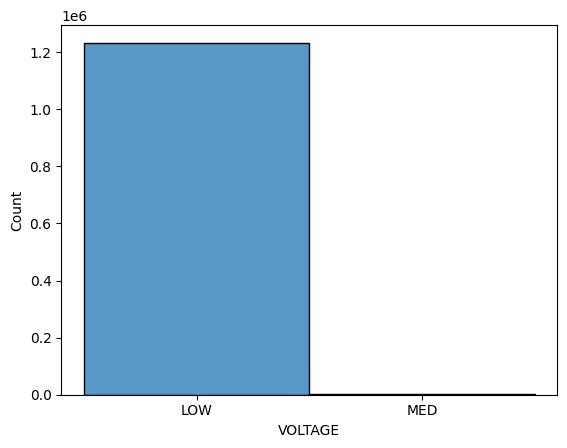

In [41]:
sns.histplot(data=df_records_train, x='VOLTAGE', bins=30)

<Axes: xlabel='PARNO', ylabel='Count'>

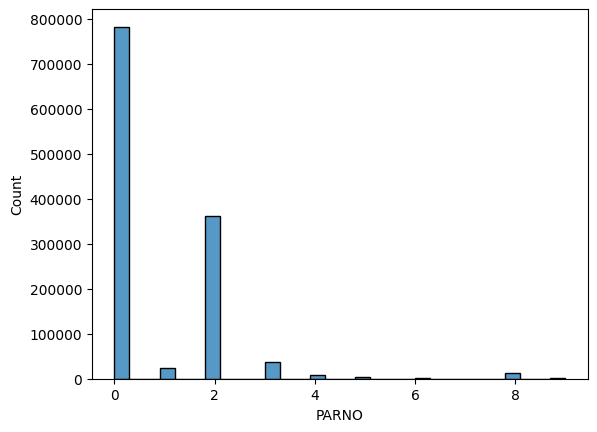

In [42]:
sns.histplot(data=df_records_train, x='PARNO', bins=30)

In [43]:
#df_records_train['PARNO'].value_counts()

<Axes: xlabel='XRHSH', ylabel='Count'>

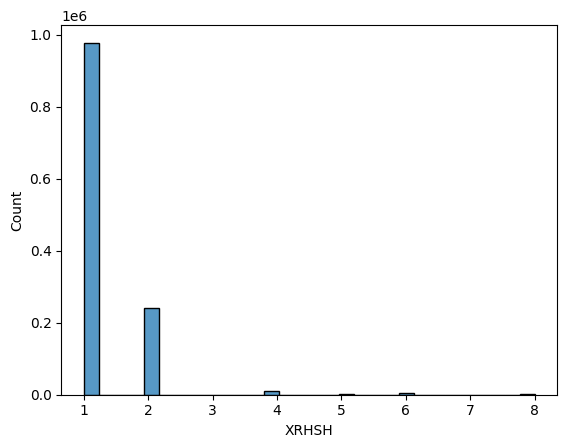

In [44]:
sns.histplot(data=df_records_train, x='XRHSH', bins=30)

In [45]:
#df_records_train['XRHSH'].value_counts()

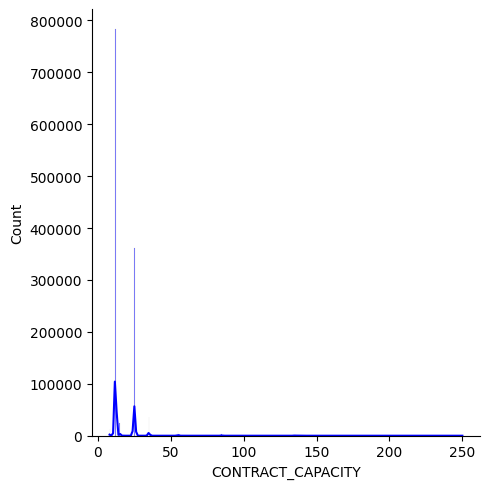

In [46]:
sns.displot(df_records_train['CONTRACT_CAPACITY'],kde=True,color='blue',height=5,aspect=1) 

In [47]:
#df_records_train['CONTRACT_CAPACITY'].describe()

<Axes: xlabel='ACCT_CONTROL', ylabel='Count'>

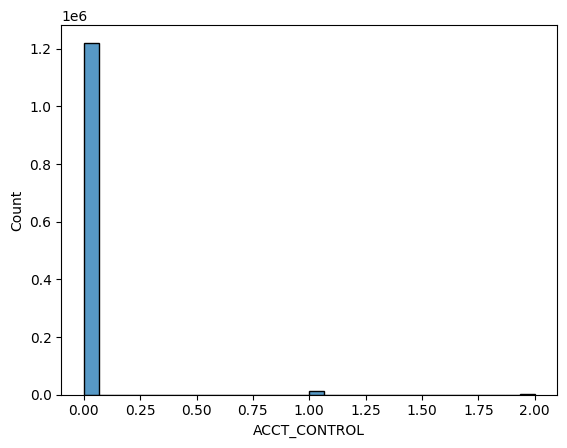

In [48]:
sns.histplot(data=df_records_train, x='ACCT_CONTROL', bins=30)

In [49]:
#df_records_train['ACCT_CONTROL'].value_counts()

### Representations

<Axes: xlabel='SUPPLIER', ylabel='Count'>

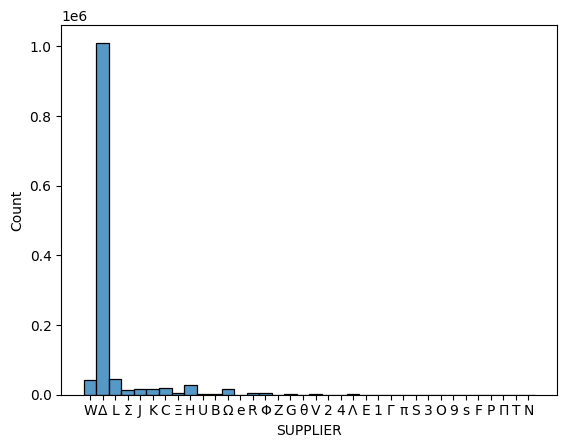

In [50]:
sns.histplot(data=df_representations_train, x='SUPPLIER')

In [51]:
#df_representations_train['SUPPLIER'].value_counts()

In [52]:
#supplier_time = df_representations_train['START_DATE'] - df_representations_train['END_DATE']

### Requests

<Axes: xlabel='REQUEST_TYPE', ylabel='Count'>

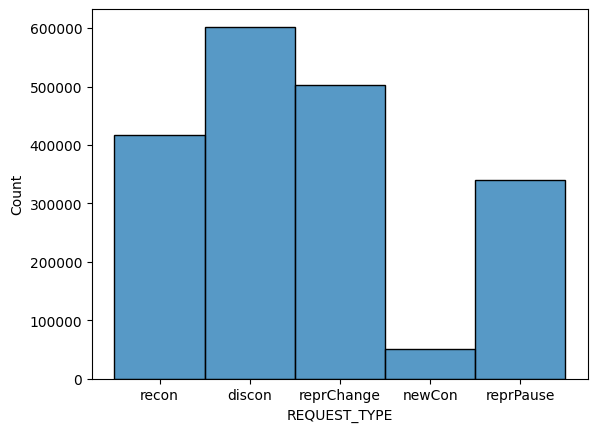

In [53]:
sns.histplot(data=df_requests_train, x='REQUEST_TYPE')

<Axes: xlabel='COMPL_REQUEST_STATUS', ylabel='Count'>

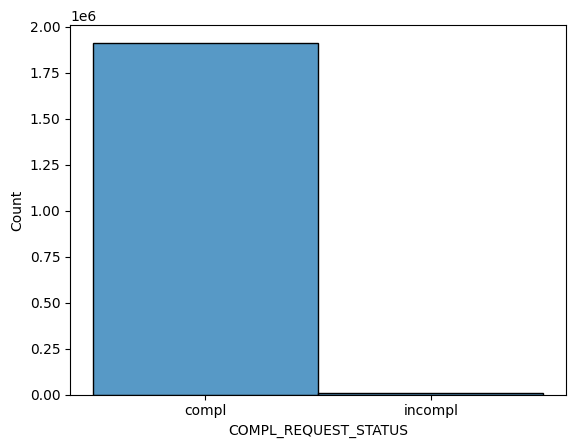

In [54]:
sns.histplot(data=df_requests_train, x='COMPL_REQUEST_STATUS')

In [55]:
df_requests_train['COMPL_REQUEST_STATUS'].value_counts()

compl      1913850
incompl       8742
Name: COMPL_REQUEST_STATUS, dtype: int64

### Consumption

<Axes: xlabel='BS_RATE', ylabel='Count'>

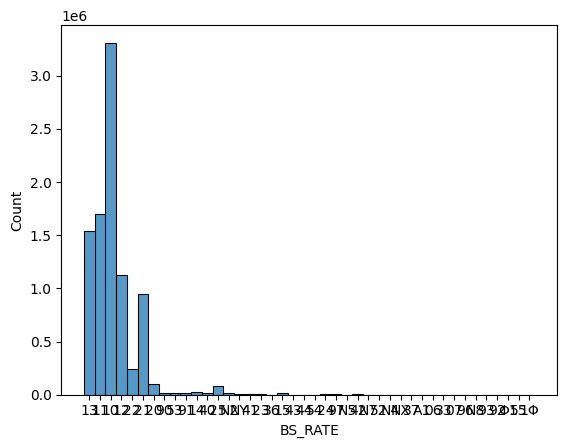

In [56]:
sns.histplot(data=df_consumptions_train, x='BS_RATE')

In [57]:
lst=[]
lst.append(df_consumptions_train['BS_RATE'].unique())

In [58]:
lst1=[]
lst1.append(df_consumptions_test['BS_RATE'].unique())

In [59]:
all(x in lst1 for x in lst)

<ipython-input-59-223f82af9bf3>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  all(x in lst1 for x in lst)


False

In [ ]:
sns.displot(df_consumptions_train['CSS_MS_HS_USE'],kde=True,color='blue',height=5,aspect=1) #αργει παρα πολυ να τρεξει!!!

In [ ]:
#df_consumptions_train['CSS_MS_HS_USE'].describe()

# Adding the variables to our train set

# Creating our df

##Using the records table as the base for the new dataframe, it contains most of the information that will be used

we can drom the coordinates as we are working for a small area in Athens

In [ ]:
#df_records_train.drop(['ACCT_WGS84_X', 'ACCT_WGS84_Y'], axis = 1, inplace = True)
#df_records_train.head()

In [ ]:
#same for test
#df_records_test.drop(['ACCT_WGS84_X', 'ACCT_WGS84_Y'], axis = 1, inplace = True)

Check if the values are unique

In [ ]:
bool_series = df_records_train.duplicated()
[i for i, x in enumerate(bool_series) if x]

##drop the columns that we will not use

In [ ]:
#df_representations_train.drop(['END_DATE'], axis = 1, inplace = True)# έχω κάνει drop το 'SUPPLIER_TO'
#df_representations_train.head()

In [ ]:
#same for test
#df_representations_test.drop(['END_DATE'], axis = 1, inplace = True)

In [ ]:
#df_requests_train.drop(['COMPL_REQUEST_STATUS', 'COMPLETION_DATE'], axis = 1, inplace = True)
#df_requests_train.head()

In [ ]:
#test
#df_requests_test.drop(['COMPL_REQUEST_STATUS', 'COMPLETION_DATE'], axis = 1, inplace = True)